### 原型聚类KMEANS

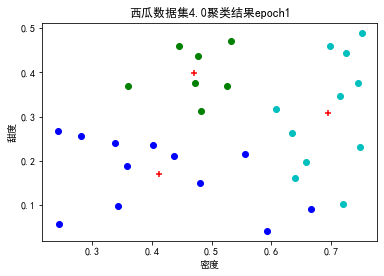

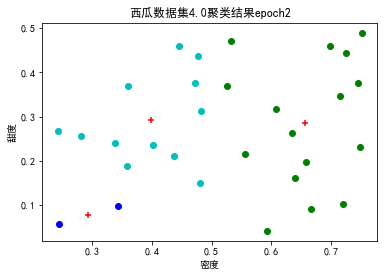

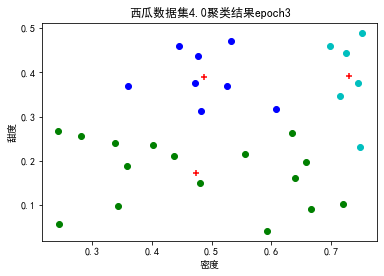

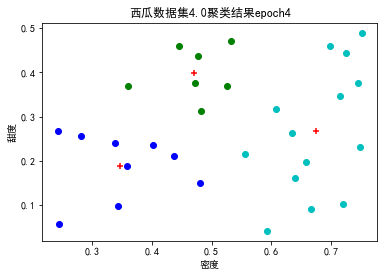

In [47]:
#KMEANS
#https://blog.csdn.net/q7672345/article/details/126408175
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]

class Kmeans:
    def __init__(self,k,epochs,data):
        '''
        :param k: 聚类族数
        :param epochs: 迭代轮数
        :param data: 西瓜数据集二维数组
        '''
        self.k = k
        self.epochs = epochs
        self.data = data
        self.center_points = []
        # 获取初始随机的聚类中心点
        for i in range(self.k):
            self.center_points.append(self.data[np.random.randint(0, len(self.data))])
        self.center_points = np.array(self.center_points, dtype=float)

    def calc_dist(self,a):
        dist = (self.center_points - a)**2
        mean_dists = np.mean(dist,axis=1)
        return mean_dists.argmin()

    def process_iter(self):
        # kmeans核心迭代过程
        for i in range(self.epochs):
            self.cluster = {}
            for i in range(len(self.data)):
                index = self.calc_dist(self.data[i])
                if index not in self.cluster:
                    self.cluster[index] = [self.data[i]]
                else:
                    self.cluster[index].append(self.data[i])
            self.upgrade()

    # 更新中心簇
    def upgrade(self):
        for i in range(self.k):
            # print(self.cluster[i])
            self.center_points[i] = np.array(self.cluster[i]).mean(axis=0)

    def get_cluster(self):
        return self.cluster

    # 绘图描点函数
    def plot_scatter(self):
        # 散点
        color = ['b','c','g','k','m','r','w','y']
        for i in range(self.k):
            x = np.array(self.cluster[i])[:,0]
            y = np.array(self.cluster[i])[:,1]
            plt.scatter(x,y,c=color[i])
        #print(self.center_points)
        # 标记中心向量点
        x = self.center_points[:,0]
        y = self.center_points[:,1]
        plt.scatter(x,y,marker='+',c='r')

        plt.title('西瓜数据集4.0聚类结果'+'epoch{}'.format(self.epochs))
        plt.xlabel('密度')
        plt.ylabel('甜度')
        plt.show()

def load_data():
    data = pd.read_csv("4.0.csv")
    data = pd.DataFrame(data)
    #print(data,data.shape)
    data_t = []
    len = data.shape[0]
    for i in range(len):
        data_t.append([data["density"][i],data["sugercontent"][i]])
    return data_t

def main():
    data = load_data()
    kmeans = Kmeans(3,1,data)
    kmeans.process_iter()
    #print(kmeans.get_cluster())
    kmeans.plot_scatter()
    
    kmeans = Kmeans(3,2,data)
    kmeans.process_iter()
    #print(kmeans.get_cluster())
    kmeans.plot_scatter()
    
    kmeans = Kmeans(3,3,data)
    kmeans.process_iter()
    #print(kmeans.get_cluster())
    kmeans.plot_scatter()
    
    kmeans = Kmeans(3,4,data)
    kmeans.process_iter()
    #print(kmeans.get_cluster())
    kmeans.plot_scatter()


if __name__ == '__main__':
    main()


### DBSCAN

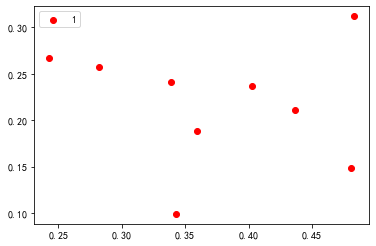

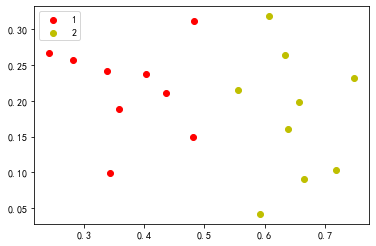

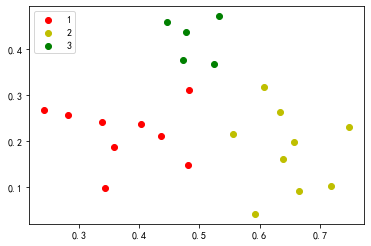

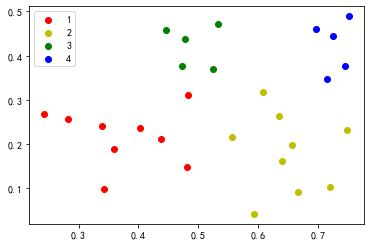

In [41]:
# ssy_4_DBSCAN
import math
import numpy as np
import pandas as pd
import pylab as pl
xigua = pd.read_csv('4.0.csv')
dataset=[(i[0],i[1]) for i in xigua.values]
#计算欧几里得距离,a,b分别为两个元组
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2)+math.pow(a[1]-b[1], 2))

#算法模型
def DBSCAN(D, e, Minpts):
    
    #初始化核心对象集合T,聚类个数k,聚类集合C, 未访问集合P,
    T = set() 
    k = 0 
    C = []
    P = set(D)
    for d in D:
        if len([ i for i in D if dist(d, i) <= e]) >= Minpts:
            T.add(d)
    #开始聚类
    #所有的核心的 有多个类
    while len(T):
        P_old = P
        #选取一个核心点
        o = list(T)[np.random.randint(0, len(T))]
        #把核心点从未选取中取出
        P = P - set(o)
        Q = []
        Q.append(o)
        while len(Q):
            q = Q[0]
            #核心点周围的点
            Nq = [i for i in D if dist(q, i) <= e]
            #核心点和周围的点都记录下来
            if len(Nq) >= Minpts:
                S = P & set(Nq)
                Q += (list(S))
                P = P - S
            Q.remove(q)
        k += 1
        Ck = list(P_old - P)
        T = T - set(Ck)
        C.append(Ck)
        draw(C)
    return C
#画图  shanyou_4_DBSCAN
    
def draw(C):
    
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []  #x坐标列表
        coo_Y = []  #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='o', color=colValue[i%len(colValue)], label=i+1)
    pl.legend(loc='upper left')
    pl.show()

C = DBSCAN(dataset, 0.11, 5) 
#draw(C)


### 层次聚类

30


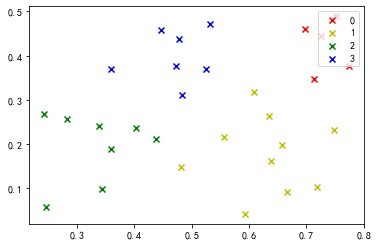

30


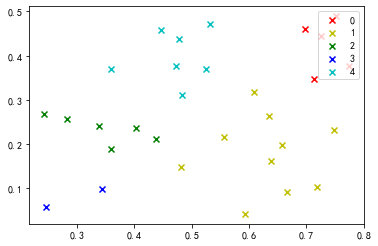

30


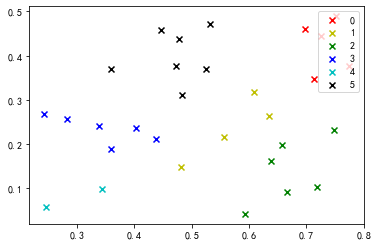

30


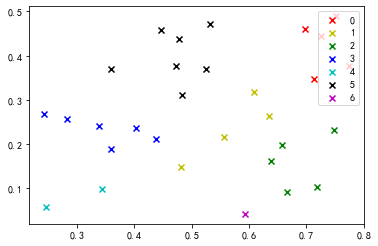

In [42]:
#AGNES
#https://zhuanlan.zhihu.com/p/367956614
#-*- coding:utf-8 -*-
import math
import pylab as pl


def dist(node1, node2):
    """
    计算欧几里得距离,node1,node2分别为两个元组
    :param node1:
    :param node2:
    :return:
    """
    return math.sqrt(math.pow(node1[0]-node2[0], 2)+math.pow(node1[1]-node2[1], 2))


def dist_min(cluster_x, cluster_y):
    """
    Single Linkage
    又叫做 nearest-neighbor ，就是取两个类中距离最近的两个样本的距离作为这两个集合的距离。
    :param cluster_x:
    :param cluster_y:
    :return:
    """
    return min(dist(node1, node2) for node1 in cluster_x for node2 in cluster_y)


def dist_max(cluster_x, cluster_y):
    """
    Complete Linkage
    这个则完全是 Single Linkage 的反面极端，取两个集合中距离最远的两个点的距离作为两个集合的距离。
    :param cluster_x:
    :param cluster_y:
    :return:
    """
    return max(dist(node1, node2) for node1 in cluster_x for node2 in cluster_y)


def dist_avg(cluster_x, cluster_y):
    """
    Average Linkage
    这种方法就是把两个集合中的点两两的距离全部放在一起求均值，相对也能得到合适一点的结果。
    :param cluster_x:
    :param cluster_y:
    :return:
    """
    return sum(dist(node1, node2) for node1 in cluster_x for node2 in cluster_y)/(len(cluster_x)*len(cluster_y))


def find_min(distance_matrix):
    """
    找出距离最近的两个簇下标
    :param distance_matrix:
    :return:
    """
    min = 1000
    x = 0; y = 0
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix[i])):
            if i != j and distance_matrix[i][j] < min:
                min = distance_matrix[i][j];x = i; y = j
    return (x, y, min)


def AGNES(dataset, distance_method, k):
    """
    聚类算法模型
    :param dataset: 数据集
    :param distance_method: 计算簇类聚类的方法
    :param k: 目标簇类数目
    :return:
    """
    print (len(dataset))
    # 初始化簇类集合和距离矩阵
    cluster_set = []
    distance_matrix = []
    for node in dataset:
        cluster_set.append([node])
    #print ('original cluster set:')
    #print (cluster_set)
    for cluster_x in cluster_set:
        distance_list = []
        for cluster_y in cluster_set:
            distance_list.append(distance_method(cluster_x, cluster_y))
        distance_matrix.append(distance_list)
    #print ('original distance matrix:')
    #print (len(distance_matrix), len(distance_matrix[0]), distance_matrix)
    q = len(dataset)
    # 合并更新
    while q > k:
        id_x, id_y, min_distance = find_min(distance_matrix)
        cluster_set[id_x].extend(cluster_set[id_y])
        cluster_set.remove(cluster_set[id_y])
        distance_matrix = []

        for cluster_x in cluster_set:
            distance_list = []
            for cluster_y in cluster_set:
                distance_list.append(distance_method(cluster_x, cluster_y))
            distance_matrix.append(distance_list)
        q -= 1
    return cluster_set


def draw(cluster_set):
    """
    画图
    :param cluster_set:
    :return:
    """
    color_list = ['r', 'y', 'g', 'b', 'c', 'k', 'm']

    for cluster_idx, cluster in enumerate(cluster_set):
        coo_x = []  # x坐标列表
        coo_y = []  # y坐标列表

        for node in cluster:
            coo_x.append(node[0])
            coo_y.append(node[1])
        pl.scatter(coo_x, coo_y, marker='x', color=color_list[cluster_idx % len(color_list)], label=cluster_idx)

    pl.legend(loc='upper right')
    pl.show()


# 数据集：每三个是一组分别是西瓜的编号，密度，含糖量
data = """
1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459"""

# 数据处理 dataset是30个样本（密度，含糖量）的列表
a = data.split(',')
dataset = [(float(a[i]), float(a[i+1])) for i in range(1, len(a)-1, 3)]

cluster_set = AGNES(dataset, dist_avg,4)
#print ('final cluster set:')
#print (cluster_set)
draw(cluster_set)

cluster_set = AGNES(dataset, dist_avg,5)
draw(cluster_set)

cluster_set = AGNES(dataset, dist_avg,6)
draw(cluster_set)

cluster_set = AGNES(dataset, dist_avg,7)
draw(cluster_set)

### LVQ

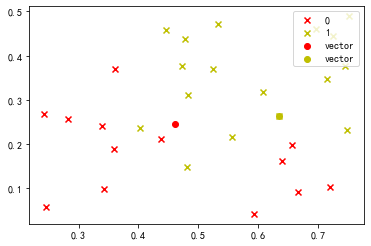

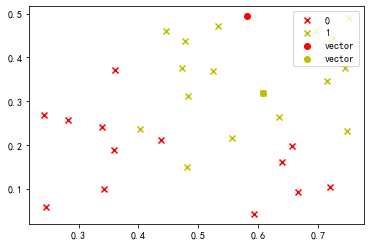

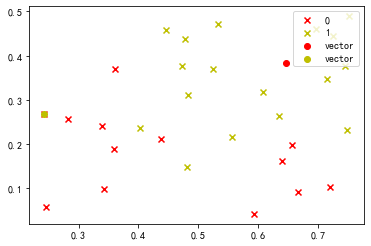

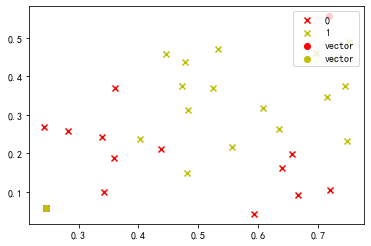

In [43]:
#https://blog.csdn.net/u014028027/article/details/71799254
#LVQ
# -*- coding:utf-8 -*-
import re
import math
import numpy as np
import pylab as pl
data = \
"""
1,0.697,0.46,Y,
2,0.744,0.376,Y,
3,0.634,0.264,Y,
4,0.608,0.318,Y,
5,0.556,0.215,Y,
6,0.403,0.237,Y,
7,0.481,0.149,Y,
8,0.437,0.211,N,
9,0.666,0.091,N,
10,0.243,0.267,N,
11,0.245,0.057,N,
12,0.343,0.099,N,
13,0.639,0.161,N,
14,0.657,0.198,N,
15,0.36,0.37,N,
16,0.593,0.042,N,
17,0.719,0.103,N,
18,0.359,0.188,N,
19,0.339,0.241,N,
20,0.282,0.257,N,
21,0.748,0.232,Y,
22,0.714,0.346,Y,
23,0.483,0.312,Y,
24,0.478,0.437,Y,
25,0.525,0.369,Y,
26,0.751,0.489,Y,
27,0.532,0.472,Y,
28,0.473,0.376,Y,
29,0.725,0.445,Y,
30,0.446,0.459,Y"""
#定义一个西瓜类，四个属性，分别是编号，密度，含糖率，是否好瓜
class watermelon:
    def __init__(self, properties):
        self.number = properties[0]
        self.density = float(properties[1])
        self.sweet = float(properties[2])
        self.good = properties[3]

#数据简单处理
a = re.split(',', data.strip(" "))
dataset = []     #dataset:数据集
for i in range(int(len(a)/4)):
    temp = tuple(a[i * 4: i * 4 + 4])
    dataset.append(watermelon(temp))


#计算欧几里得距离,a,b分别为两个元组
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0], 2)+math.pow(a[1]-b[1], 2))

#算法模型
def LVQ(dataset, a, max_iter):
    #统计样本一共有多少个分类
    T = list(set(i.good for i in dataset))
    #随机产生原型向量
    P = [(i.density, i.sweet) for i in np.random.choice(dataset, len(T))]
    while max_iter > 0:
        X = np.random.choice(dataset, 1)[0]
        index = np.argmin(dist((X.density, X.sweet), i) for i in P)
        t = T[index]
        if t == X.good:
            P[index] = ((1 - a) * P[index][0] + a * X.density, (1 - a) * P[index][1] + a * X.sweet)
        else:
            P[index] = ((1 + a) * P[index][0] - a * X.density, (1 + a) * P[index][1] - a * X.sweet)
        max_iter -= 1
    return P

def train_show(dataset, P):
    C = [[] for i in P]
    for i in dataset:
        C[i.good == 'Y'].append(i)
    return C

#画图
def draw(C, P):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j].density)
            coo_Y.append(C[i][j].sweet)
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
    #展示原型向量
    P_x = []
    P_y = []
    for i in range(len(P)):
        P_x.append(P[i][0])
        P_y.append(P[i][1])
        pl.scatter(P[i][0], P[i][1], marker='o', color=colValue[i%len(colValue)], label="vector")
    pl.legend(loc='upper right')
    pl.show()

P = LVQ(dataset, 0.01, 50)
C = train_show(dataset, P)
draw(C, P)

P = LVQ(dataset, 0.01, 100)
C = train_show(dataset, P)
draw(C, P)

P = LVQ(dataset, 0.01, 200)
C = train_show(dataset, P)
draw(C, P)

P = LVQ(dataset, 0.01, 400)
C = train_show(dataset, P)
draw(C, P)

In [44]:
"""1,0.697,0.46,Y,
2,0.774,0.376,Y,
3,0.634,0.264,Y,
4,0.608,0.318,Y,
5,0.556,0.215,Y,
6,0.403,0.237,Y,
7,0.481,0.149,Y,
8,0.437,0.211,Y,
9,0.666,0.091,N,
10,0.639,0.161,N,
11,0.657,0.198,N,
12,0.593,0.042,N,
13,0.719,0.103,N,
14,0.243,0.267,N,
15,0.245,0.057,N,
16,0.343,0.099,N,
17,0.359,0.188,N,
18,0.339,0.241,N,
19,0.282,0.257,N,
20,0.748,0.232,N,
21,0.714,0.346,Y,
22,0.483,0.312,Y,
23,0.478,0.437,Y,
24,0.525,0.369,Y,
25,0.751,0.489,Y,
26,0.532,0.472,Y,
27,0.473,0.376,Y,
28,0.725,0.445,Y,
29,0.446,0.459,Y"""

'1,0.697,0.46,Y,\n2,0.774,0.376,Y,\n3,0.634,0.264,Y,\n4,0.608,0.318,Y,\n5,0.556,0.215,Y,\n6,0.403,0.237,Y,\n7,0.481,0.149,Y,\n8,0.437,0.211,Y,\n9,0.666,0.091,N,\n10,0.639,0.161,N,\n11,0.657,0.198,N,\n12,0.593,0.042,N,\n13,0.719,0.103,N,\n14,0.243,0.267,N,\n15,0.245,0.057,N,\n16,0.343,0.099,N,\n17,0.359,0.188,N,\n18,0.339,0.241,N,\n19,0.282,0.257,N,\n20,0.748,0.232,N,\n21,0.714,0.346,Y,\n22,0.483,0.312,Y,\n23,0.478,0.437,Y,\n24,0.525,0.369,Y,\n25,0.751,0.489,Y,\n26,0.532,0.472,Y,\n27,0.473,0.376,Y,\n28,0.725,0.445,Y,\n29,0.446,0.459,Y'